# Titanic Analysis Guide 


# Content:
### Step 1 - Import Libraries
- We need to import the necessary libraries for many things
- For Ex: In order to use a prewritten algorithm then we must import a library.

### Step 2 - Read Data 
- Read in the train and test data 
- Check data

### Step 3 - Data Visualization
- Graph and visualize each column to see if there is a clear correlation or similarities
 
### Step 4 - Data Preparation 
- For the columns with missing values impute them
- Create new features 'Title' and 'FamSize'
- Drop certain features which are useless or have too many missing values
 
### Step 5 - Modelling
- Select features to keep
- Split dataset back into train and test
- Use GridCV and search through hyperparameters to find the best model. This is commented out because we already have the best parameters in the next cell.
- Use "accuracy_score" to print out score 


# 1. Importing Libraries

At the start of every notebook you must import necessary libraries in order to simply do Data Science.

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from statistics import mode
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score, train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler

# 2. Read Data 

In this section we read in the data and check the data we are working with. As we check the data we can clearly see the data's dimensions and it's features.

In [5]:
# 1- lire les données 'train.csv'
train = pd.read_csv('data/train.csv')

In [6]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [242]:
len(train.Age.unique())

89

# Variables description:
1. survival - Survival (0 = No; 1 = Yes)
2. class - Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)
3. name - Name
4. sex - Sex
5. age - Age
6. sibsp - Number of Siblings/Spouses Aboard
7. parch - Number of Parents/Children Aboard
8. ticket - Ticket Number
9. fare - Passenger Fare (Tarif)
10. cabin - Cabin
11. embarked - Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)

In [243]:
#2- combien on a d'observations dans les données (nombre de ligne)?
train.shape
len(train)

891

In [244]:
#3- Quels sont les types des variables ?
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

# 3. Data Visualization

In this section we view each feature's survival rate using barplots and factorplots. Using the visualizations we make assumptions and find correlations between different features.

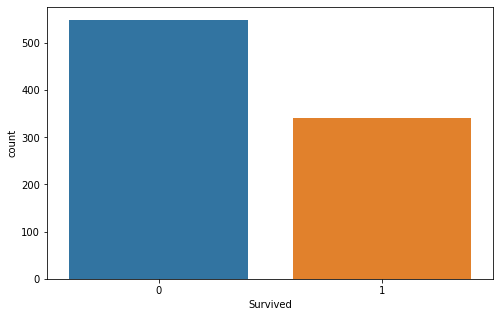

In [8]:
fig = plt.figure(figsize=(8,5))
sns.countplot(train['Survived'], data=train)

We can see that overall most passengers didn't survive

### 3.1 Sex Visualization

In [246]:
#4- print numbers of females vs. males that survive
print("number of females who survived:", len(train[train["Sex"] == 'female'][train['Survived'] == 1]))

print("number of males who survived:", len(train[train["Sex"] == 'male'][train['Survived'] == 1]))

number of females who survived: 233
number of males who survived: 109


Percentage of females who survived: 74.20382165605095
Percentage of males who survived: 18.890814558058924


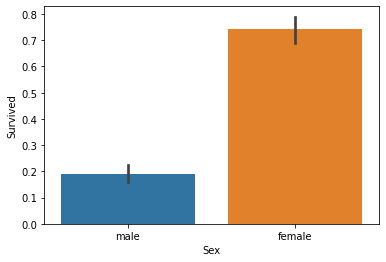

In [247]:
#5- faire les histogrammes du nombres des voyageurs qui ont survécu en fonction de leur sexe
sns.barplot(x="Sex", y="Survived", data=train)

#print percentages of females vs. males that survive
print("Percentage of females who survived:", train["Survived"][train["Sex"] == 'female'].value_counts(normalize = True)[1]*100)

print("Percentage of males who survived:", train["Survived"][train["Sex"] == 'male'].value_counts(normalize = True)[1]*100)

- Females have a much higher chance of Survival than men

### 3.2 Pclass Visualization

Percentage of Pclass = 1 who survived: 62.96296296296296
Percentage of Pclass = 2 who survived: 47.28260869565217
Percentage of Pclass = 3 who survived: 24.236252545824847


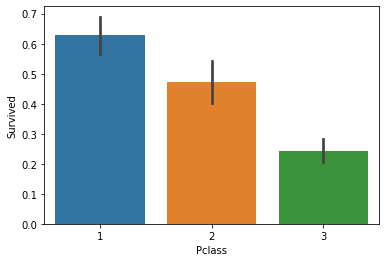

In [248]:
#6 faire les histogrammes du nombres des voyageurs qui ont survécu en fonction de leur Pclass
sns.barplot(x="Pclass", y="Survived", data=train)

#print percentage of people by Pclass that survived
print("Percentage of Pclass = 1 who survived:", train["Survived"][train["Pclass"] == 1].value_counts(normalize = True)[1]*100)

print("Percentage of Pclass = 2 who survived:", train["Survived"][train["Pclass"] == 2].value_counts(normalize = True)[1]*100)

print("Percentage of Pclass = 3 who survived:", train["Survived"][train["Pclass"] == 3].value_counts(normalize = True)[1]*100)

- People who had a better class were more likely to Survive

### 3.3 SibSp Visualization

Percentage of SibSp = 0 who survived: 34.53947368421053
Percentage of SibSp = 1 who survived: 53.588516746411486
Percentage of SibSp = 2 who survived: 46.42857142857143


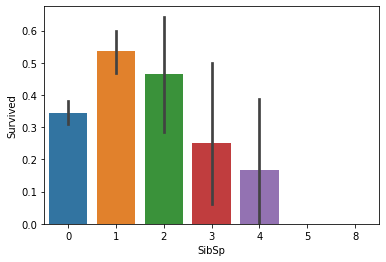

In [249]:
#7- faire les histogrammes du nombres des voyageurs qui ont survécu en fonction de leur SibSp
sns.barplot(x="SibSp", y="Survived", data=train)

#I won't be printing individual percent values for all of these.
print("Percentage of SibSp = 0 who survived:", train["Survived"][train["SibSp"] == 0].value_counts(normalize = True)[1]*100)

print("Percentage of SibSp = 1 who survived:", train["Survived"][train["SibSp"] == 1].value_counts(normalize = True)[1]*100)

print("Percentage of SibSp = 2 who survived:", train["Survived"][train["SibSp"] == 2].value_counts(normalize = True)[1]*100)

- There isn't a clear correlation but in general people with more siblings/spouses were less likely survive. Also people with no siblings/spouses were less likely to survive than people with one or two siblings/spouses.

### 3.4 Parch Visualization

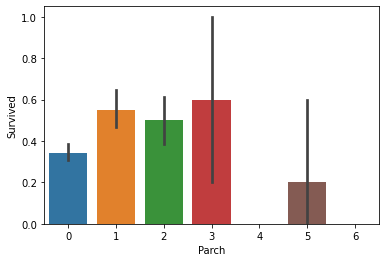

In [250]:
sns.barplot(x="Parch", y="Survived", data=train)
plt.show()

- Again, no clear correlation but people with no parents were less likely to survive than those with 1-3 parents/children.

### 3.5 Age Visualization

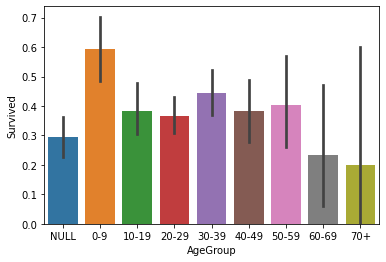

In [251]:
# #sort the ages into logical categories
train["Age"] = train["Age"].fillna(-0.5)
bins = [-1, 0, 10, 20, 30, 40, 50, 60, 70, np.inf]
labels = ['NULL', '0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70+']
train['AgeGroup'] = pd.cut(train["Age"], bins, labels = labels)



#draw a bar plot of Age vs. survival
sns.barplot(x="AgeGroup", y="Survived", data=train)
plt.show()

# Delete 'AgeGroup' since we don't need it anymore
for df in [train]:
    del(df['AgeGroup'])


- People ages 0-9 were most likely to survive

# 4. Data Preparation

We find correlations between features and impute missing values using the correlations. For categorical features we map the feature so it becomes a numerical feature. Using Feature Engineering we are able to create new features 'Title' and 'FamSize' which will overall improve our model performance.

In [252]:
train.isnull().mean().sort_values(ascending=False)

Cabin          0.771044
Embarked       0.002245
Fare           0.000000
Ticket         0.000000
Parch          0.000000
SibSp          0.000000
Age            0.000000
Sex            0.000000
Name           0.000000
Pclass         0.000000
Survived       0.000000
PassengerId    0.000000
dtype: float64

Observations for Imputing Missing Values:
- Cabin is missing 77.4%  of its values. We'll probably drop this column eventually.
- Age is missing about 20% of its values. These are imputable therefore we probably will keep this column.
- Embarked and Fare are missing less than 1% of their values. We are definitely keeping these columns.

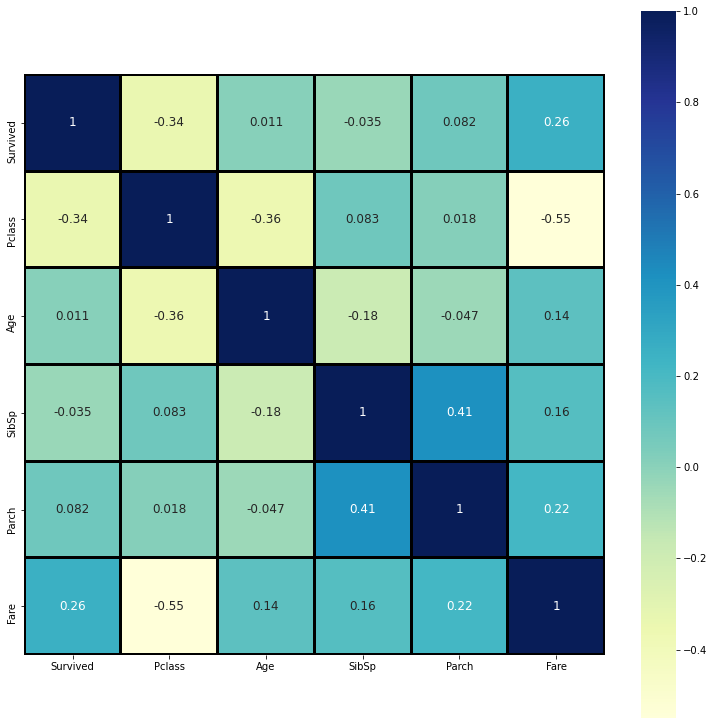

In [253]:
# Checking correlations with Heatmap

fig, axs = plt.subplots(nrows=1, figsize=(13, 13))
sns.heatmap(train.drop(['PassengerId'], axis=1).corr(), annot=True, square=True, cmap='YlGnBu', linewidths=2, linecolor='black', annot_kws={'size':12})

### 4.1 Fare Feature

There is only one passenger with missing Fare value. We can assume that Fare is related to family size (Parch and SibSp) and Pclass features. Median Fare value of a male with a third class ticket and no family is a logical choice to fill the missing value.

In [254]:
train.isnull().mean().sort_values(ascending=False)

Cabin          0.771044
Embarked       0.002245
Fare           0.000000
Ticket         0.000000
Parch          0.000000
SibSp          0.000000
Age            0.000000
Sex            0.000000
Name           0.000000
Pclass         0.000000
Survived       0.000000
PassengerId    0.000000
dtype: float64

- We can clearly see that the more money the passenger spends the higher chance of survival. According to the heatmap, 'Pclass' is the most correlated feature to 'Fare', with a correlation of -0.56. 'Family Size' ('Parch' + 'SibSp') is also related to 'Fare' so we group them with 'Fare' to find the median of 'Fare'

In [255]:
train['Fare'].corr(train['Pclass'])

-0.5494996199439082

- Again we fill in the median of Fare based on the passenger's Pclass and the Family Size, meaning whatever value the passenger's Pclass is and the Family Size, we find the median of Fare in that category

In [256]:
med_fare = train.groupby(['Pclass', 'Parch', 'SibSp']).Fare.median()[3][0][0]
# Filling the missing value in Fare with the median Fare of 3rd class alone passenger
train['Fare'] = train['Fare'].fillna(med_fare)

### 4.2 Embarked Feature

In [257]:
train.isnull().mean().sort_values(ascending=False)

Cabin          0.771044
Embarked       0.002245
Fare           0.000000
Ticket         0.000000
Parch          0.000000
SibSp          0.000000
Age            0.000000
Sex            0.000000
Name           0.000000
Pclass         0.000000
Survived       0.000000
PassengerId    0.000000
dtype: float64

In [258]:
# 8- Afficher le nombre de valeurs unique pour chaque modalité de la varible 'Embarked'(utiliser la méthode valie_counts de pandas)
train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

We fill missing values of 'Embarked' with the most frequent value of 'Embarked' which is the value 'S'

In [259]:
# 9- Remplacer les valeurs manquantes de la variable 'Embarked' par la modalité la plus fréquente
train["Embarked"] = train["Embarked"].fillna("S")

### 4.3 Title Feature

- We are basically creating a new column 'Title' and extracting the Title from the 'Name' column

In [260]:
train['Title'] = train['Name'].str.extract(' ([A-Za-z]+)\.', expand = False)
train['Title'].unique().tolist()

['Mr',
 'Mrs',
 'Miss',
 'Master',
 'Don',
 'Rev',
 'Dr',
 'Mme',
 'Ms',
 'Major',
 'Lady',
 'Sir',
 'Mlle',
 'Col',
 'Capt',
 'Countess',
 'Jonkheer']

In [261]:
# This shows the percentage of occurrences for each title. 'Mr' occurs the most often.

train['Title'].value_counts(normalize=True)*100

Mr          58.024691
Miss        20.426487
Mrs         14.029181
Master       4.489338
Dr           0.785634
Rev          0.673401
Col          0.224467
Major        0.224467
Mlle         0.224467
Capt         0.112233
Mme          0.112233
Countess     0.112233
Sir          0.112233
Ms           0.112233
Jonkheer     0.112233
Don          0.112233
Lady         0.112233
Name: Title, dtype: float64

- Some of the titles above are quite unfamiliar, so we decide to replace these titles with more familiar titles which organizes our categories. After replacing these titles we only end up with 5 distinct titles.

In [262]:
title_mapping = {'Mr': 0, 'Mrs': 0, 'Miss': 0, 'Master' : 1,'Don': 1, 'Rev' : 1,'Dr' : 1,'Mme': 0, 'Ms': 0, 'Major': 1,
 'Lady': 1, 'Sir': 1, 'Mlle': 0, 'Col': 1, 'Capt': 1, 'Countess': 1, 'Jonkheer': 1,'Dona': 1,}

train['Title'] = train['Title'].map(title_mapping)
train['Title'] = train['Title'].fillna(0)
train['Title'].value_counts()

0    828
1     63
Name: Title, dtype: int64

In [263]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


### 4.4 Age Feature

- We are planning to impute missing values in the column 'Age'. 'Pclass' and 'Sex' are correlated to 'Age', so we group them with 'Age' to find the median.

In [264]:
age_by_pclass_sex = train.groupby(['Sex', 'Pclass']).median()['Age']

age_by_pclass_sex


Sex     Pclass
female  1         32.5
        2         28.0
        3         15.5
male    1         36.0
        2         29.0
        3         21.0
Name: Age, dtype: float64

In [265]:
for pclass in range(1, 4):
    for sex in ['female', 'male']:
        print('Median age of Pclass {} {}s: {}'.format(pclass, sex, age_by_pclass_sex[sex][pclass]))



# Filling the missing values in Age with the medians of Sex and Pclass groups
train['Age'] = train.groupby(['Sex', 'Pclass'])['Age'].apply(lambda x: x.fillna(x.median()))

Median age of Pclass 1 females: 32.5
Median age of Pclass 1 males: 36.0
Median age of Pclass 2 females: 28.0
Median age of Pclass 2 males: 29.0
Median age of Pclass 3 females: 15.5
Median age of Pclass 3 males: 21.0


### 4.5 Ticket Feature

In [266]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


- 'Ticket' is a pretty useless feature so we decide to drop it

### 4.6 Sex Feature

In [267]:
# 10- Quel prétraitement à faire pour la variable 'sexe' ? 
#Replace 'Male' with 0, 'Female' with 1

sex_mapping = {'male':0, 'female':1}
train['Sex'] = train['Sex'].map(sex_mapping)

### 4.7 Name Feature

- We already used the 'Name' feature for making the 'Title' column, so we do not need it anymore.

### 4.8 Cabin Feature

- Cabin has too many missing values (77.5%) so we will eventually drop this feature

### 4.9 Family Size Feature (Created)

- Columns 'SibSp' and 'Parch' are very similar to each other in meaning and in correlation. 

In [268]:
train['SibSp'].corr(train['Parch'])

0.41483769862015646

In [269]:
train['Parch'].corr(train['SibSp'])

0.4148376986201565

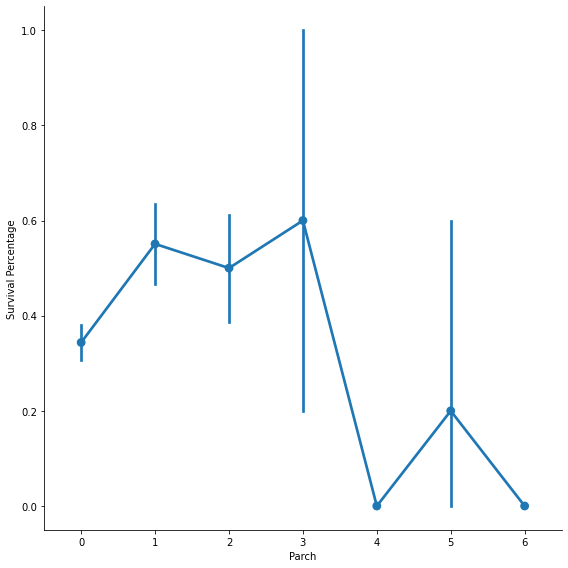

In [270]:
# 11 - Consulter la doc de seaborn pour la fonction factorplot() et faire le factorplot du pourcentage 
# des survivants en fonction de la variable 'Parch'
g  = sns.factorplot(x="Parch",y="Survived",data=train, size = 8)
g = g.set_ylabels("Survival Percentage")

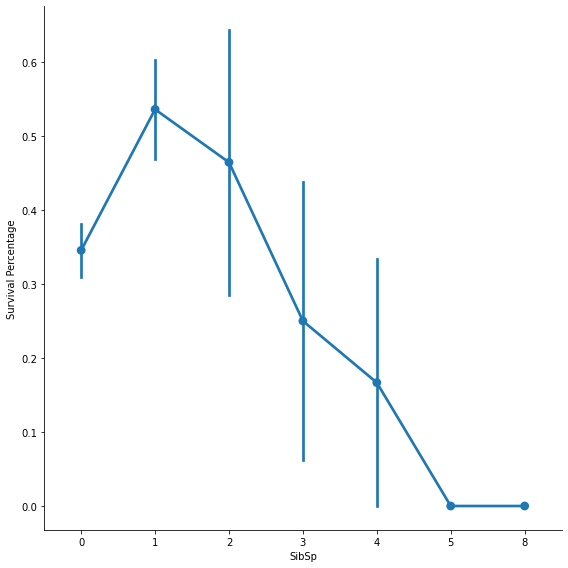

In [271]:
#12 - faire le factorplot du pourcentage 
# des survivants en fonction de la variable 'SibSp'

g  = sns.factorplot(x="SibSp",y="Survived",data=train, size = 8)
g = g.set_ylabels("Survival Percentage")

- According to their factorplots, they are both relatively weak features alone
- They are highly correlated to each other so we decide to combine them for a feature representing Family Size

In [272]:
# Family Size = # of Siblings + # of Parents + You
train['FamSize'] = train['SibSp'] + train['Parch'] + 1

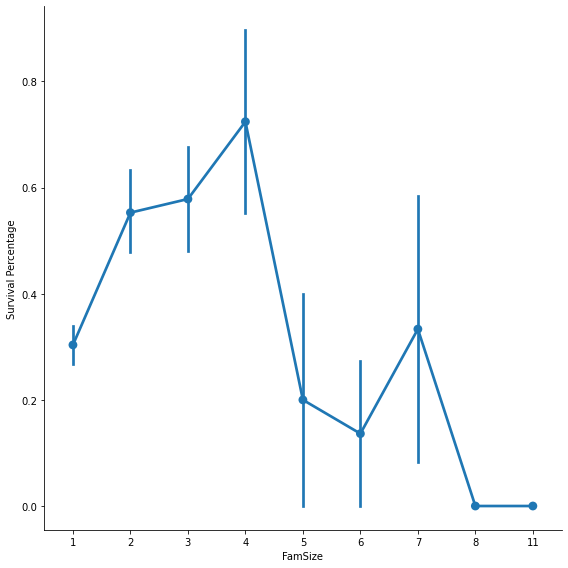

In [273]:
# 13- faire le factorplot du pourcentage 
# des survivants en fonction de la variable 'FamSize'
#14 - Interpréter le graph

g  = sns.factorplot(x="FamSize",y="Survived",data=train, size = 8)
g = g.set_ylabels("Survival Percentage")

According to this factorplot:
- It's clearly obvious that passengers who are alone are much less likely to survive than with a family size of 2, 3, or 4
- A family larger than 5 also is much less likely to survive

- We decide to split 'FamSize' feature into multiple categories due to their different survival percentages

In [274]:
train['Single'] = train['FamSize'].map(lambda s: 1 if s == 1 else 0)
train['SmallF'] = train['FamSize'].map(lambda s: 1 if  s == 2  else 0)
train['MedF'] = train['FamSize'].map(lambda s: 1 if 3 <= s <= 4 else 0)
train['LargeF'] = train['FamSize'].map(lambda s: 1 if s >= 5 else 0)

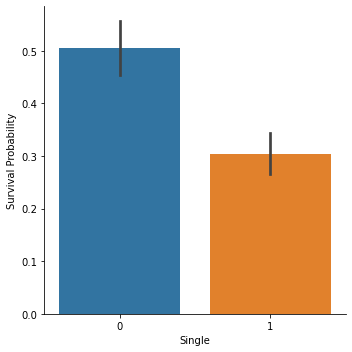

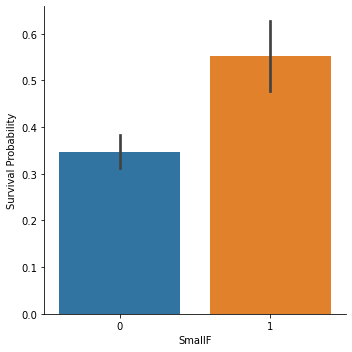

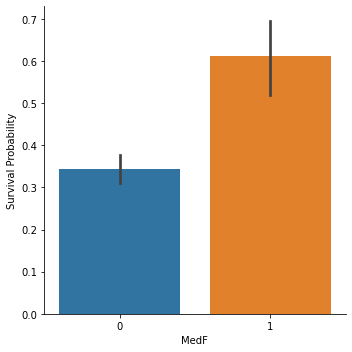

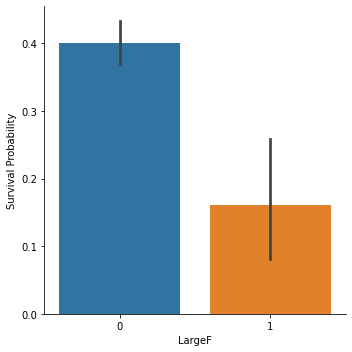

In [275]:
g = sns.factorplot(x="Single",y="Survived",data=train,kind="bar")
g = g.set_ylabels("Survival Probability")
g = sns.factorplot(x="SmallF",y="Survived",data=train,kind="bar")
g = g.set_ylabels("Survival Probability")
g = sns.factorplot(x="MedF",y="Survived",data=train,kind="bar")
g = g.set_ylabels("Survival Probability")
g = sns.factorplot(x="LargeF",y="Survived",data=train,kind="bar")
g = g.set_ylabels("Survival Probability")

# 5. Modeling

We choose the features that we think are going to be beneficial towards our model performance. We then split the data into train and validation data in order to test out our model. Using GridSearchCV (commented out because it was already prerun) we find the most optimal parameters for our model. 

Note: I've already ran GridSearchCV and included the most optimal parameters in the model cell. That is why the GridSearchCV cell is commented out.

- We Decide to keep these features, and the other features are dropped

In [276]:
features = ['Survived','Embarked', 'Pclass', 'Sex', 'Title', 'FamSize', 'Single', 'SmallF', 'MedF', 'LargeF', 'Fare', 'Age']
train = train[features]
train.head()

,Survived,Embarked,Pclass,Sex,Title,FamSize,Single,SmallF,MedF,LargeF,Fare,Age
0,0,S,3,0,0,2,0,1,0,0,7.2500,22.0
1,1,C,1,1,0,2,0,1,0,0,71.2833,38.0
2,1,S,3,1,0,1,1,0,0,0,7.9250,26.0
3,1,S,1,1,0,2,0,1,0,0,53.1000,35.0
4,0,S,3,0,0,1,1,0,0,0,8.0500,35.0


- We can clearly see that 'Embarked' and 'Title' are still categorical features. Therefore we choose to Hot-Encode them in order to make them into numerical features

In [277]:
# 14- faire le traitement nécessaire pour la variable 'Embarked' (que les valeurs numériques sont acceptées !)
# utiliser la fonction get_dummies de pandas
train = pd.get_dummies(train, columns = ["Embarked"])

In [278]:
train.head()

,Survived,Pclass,Sex,Title,FamSize,Single,SmallF,MedF,LargeF,Fare,Age,Embarked_C,Embarked_Q,Embarked_S
0,0,3,0,0,2,0,1,0,0,7.2500,22.0,0,0,1
1,1,1,1,0,2,0,1,0,0,71.2833,38.0,1,0,0
2,1,3,1,0,1,1,0,0,0,7.9250,26.0,0,0,1
3,1,1,1,0,2,0,1,0,0,53.1000,35.0,0,0,1
4,0,3,0,0,1,1,0,0,0,8.0500,35.0,0,0,1


- Split dataset back into train and test variables.

In [279]:
# Divier les données en données d'entrainement et données de test
X_train, X_test, y_train, y_test = train_test_split(train.drop(['Survived'],1), train['Survived'], test_size=0.25)

In [280]:
#15 - Afficher le nombre d'observation dans l'échantillon d'entrainement et du test
print(len(X_train))
print(len(X_test))

668
223


In [281]:
train.head()

,Survived,Pclass,Sex,Title,FamSize,Single,SmallF,MedF,LargeF,Fare,Age,Embarked_C,Embarked_Q,Embarked_S
0,0,3,0,0,2,0,1,0,0,7.2500,22.0,0,0,1
1,1,1,1,0,2,0,1,0,0,71.2833,38.0,1,0,0
2,1,3,1,0,1,1,0,0,0,7.9250,26.0,0,0,1
3,1,1,1,0,2,0,1,0,0,53.1000,35.0,0,0,1
4,0,3,0,0,1,1,0,0,0,8.0500,35.0,0,0,1


In [282]:
X_train.head()

,Pclass,Sex,Title,FamSize,Single,SmallF,MedF,LargeF,Fare,Age,Embarked_C,Embarked_Q,Embarked_S
677,3,1,0,1,1,0,0,0,9.8417,18.0,0,0,1
470,3,0,0,1,1,0,0,0,7.2500,-0.5,0,0,1
788,3,0,1,4,0,0,1,0,20.5750,1.0,0,0,1
862,1,1,0,1,1,0,0,0,25.9292,48.0,0,0,1
186,3,1,0,2,0,1,0,0,15.5000,-0.5,0,1,0


- Using GridSearch we search through the hyperparameters and find the model with the best hyperparameters listed below in 'rf_param_grid'
- We then use that model to train X_train and y_train data

### - NOTE: The best parameters are in the next cell because GridSearching takes a long time and I don't want you to waste time waiting for this cell to run :)

# Cross Validation:

### La procédure générale de k fold crossvalidation est la suivante:

1. Mélangez le jeu de données de manière aléatoire.
2. Fractionner l'ensemble de données en k groupes
3. Pour chaque groupe unique:
3. 1. Prenez un groupe comme un ensemble de données de test
3. 2. Prenez les groupes restants comme un ensemble de données de formation
3. 3. Monter un modèle sur l'ensemble d'entraînement et l'évaluer sur l'ensemble de test
3. 4. Conserver le score d'évaluation et jeter le modèle
4. Résumer les compétences du modèle en utilisant l'échantillon de scores d'évaluation du modèle

In [217]:
from sklearn.model_selection import KFold

kf = KFold(n_splits=5, random_state=2)


rfc = RandomForestClassifier()

## Search grid for optimal parameters
rf_param_grid = {
                 'criterion':['gini'],
                 'max_features': ['auto',3,5],
                 'n_estimators': [900, 1100, 1300,1500,1800,2000],
                'verbose': [0, 1]}


gs_rfc = GridSearchCV(rfc, param_grid = rf_param_grid, cv=kf, scoring="accuracy", n_jobs= 4, verbose = 1)

gs_rfc.fit(X_train,y_train)

# Print out best hyperparameters
gs_rfc.best_estimator_

Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   33.3s
[Parallel(n_jobs=4)]: Done 180 out of 180 | elapsed:  2.6min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 900 out of 900 | elapsed:    1.0s finished


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features=5,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=900,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=1, warm_start=False)

- We print out the best hyperparameters after searching using GridCV
- Grid Searching does take a while to run so you can choose to comment this out because we already know the best parameters(next cell)

In [218]:
# Create final model using best hyperparameters from previous cell
final_model = RandomForestClassifier(criterion='gini', 
                                           n_estimators=900,
                                           max_features=5,
                                           verbose=1)


# Train final_model with train data
final_model.fit(X_train, y_train)

# Predict final_model
predictions = final_model.predict(X_test)

# Print out score
print('Accuracy: ', accuracy_score(predictions, y_test))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Accuracy:  0.8430493273542601


[Parallel(n_jobs=1)]: Done 900 out of 900 | elapsed:    1.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 900 out of 900 | elapsed:    0.0s finished


In [219]:
estimator = final_model.estimators_[1]


In [220]:
from sklearn.tree import export_graphviz
# Export as dot file
export_graphviz(estimator, 
                out_file='tree2.dot', 
                feature_names = X_train.columns,
               
                rounded = True, proportion = False, 
                precision = 2, filled = True)



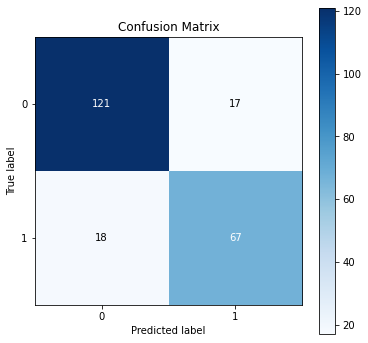

In [221]:
import scikitplot as skplt

skplt.metrics.plot_confusion_matrix(
    y_test, 
    predictions,
    figsize=(6,6))

In [222]:
feature_importances = pd.DataFrame(rf.feature_importances_,
                                   index = X_train.columns,
                                    columns=['importance']).sort_values('importance',                                                                 ascending=False)

In [223]:
feature_importances

,importance
Fare,0.261952
Sex,0.256122
Age,0.240971
Pclass,0.087669
FamSize,0.040543
Title,0.025660
MedF,0.016423
Embarked_S,0.015016
Embarked_C,0.014733
Single,0.012944


In [224]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

ns_probs = [0 for _ in range(len(y_test))]

lr_probs = final_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 900 out of 900 | elapsed:    0.0s finished


In [225]:
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.898


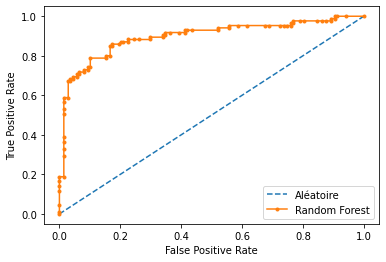

In [226]:
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Aléatoire')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Random Forest')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

In [227]:
y_test.value_counts()

0    138
1     85
Name: Survived, dtype: int64